In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("papers_processed.csv",  delimiter=";", quotechar="|", encoding="utf-8", header=None)
df.columns = ["paper_id", "paper_title", "domain", "num_tables", "num_figures"]

# Display basic info
print(df.info(),"\n")
print(df.head(),"\n")
print(df.describe(),"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102549 entries, 0 to 102548
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   paper_id     102549 non-null  float64
 1   paper_title  102549 non-null  object 
 2   domain       102549 non-null  object 
 3   num_tables   102549 non-null  int64  
 4   num_figures  102549 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB
None 

     paper_id                                        paper_title domain  \
0  2305.02736     Separability and Non-Determinizability of WSTS     cs   
1  2305.07570  Isotropic Point Cloud Meshing using unit Spher...     cs   
2  2305.15805  Dynamic Context Pruning for Efficient and Inte...     cs   
3  2306.10843  Female mosquito detection by means of AI techn...     cs   
4  2307.08187  An Empirical Study of Pre-trained Model Select...     cs   

   num_tables  num_figures  
0           0            0  
1          

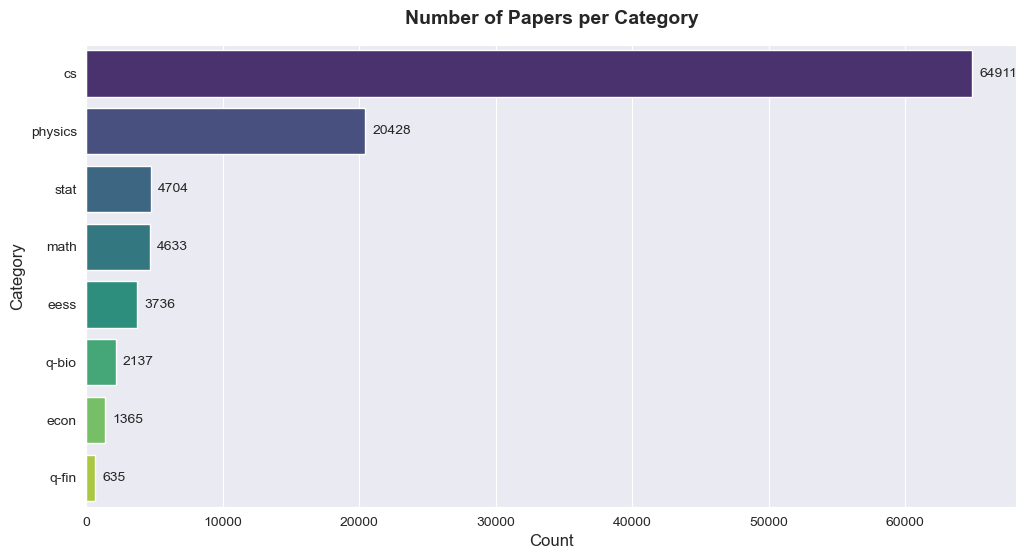

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(y=df["domain"], order=df["domain"].value_counts().index, palette="viridis")
plt.title("Number of Papers per Category", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Category", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=5)

plt.show()

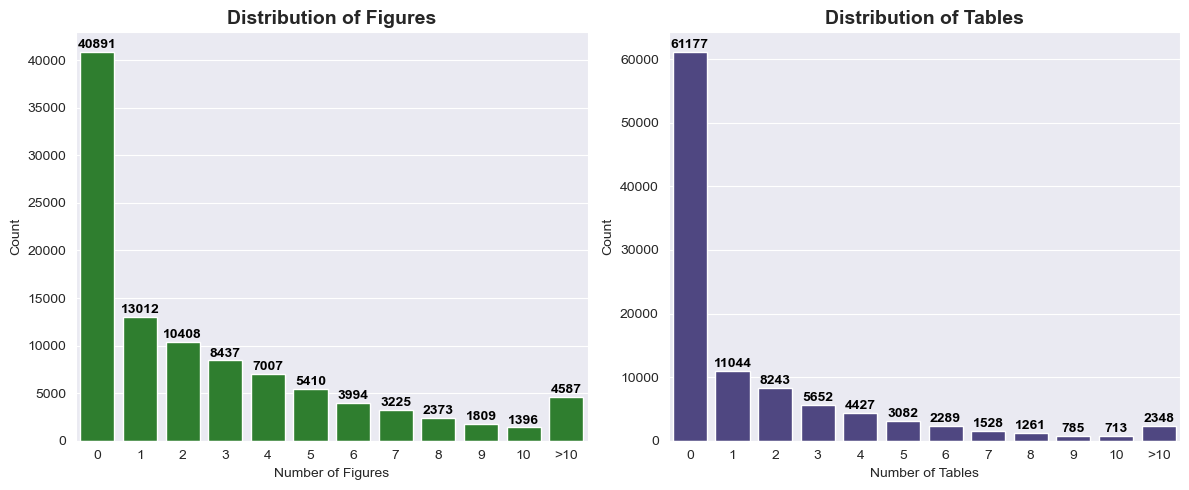

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 5))

categories = [str(i) for i in range(11)] + [">10"]
fig_counts = [(df["num_figures"] == i).sum() for i in range(11)] + [(df["num_figures"] > 10).sum()]
table_counts = [(df["num_tables"] == i).sum() for i in range(11)] + [(df["num_tables"] > 10).sum()]

# Figures bar chart
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=categories, y=fig_counts, color="forestgreen", width=0.8)
plt.title("Distribution of Figures", fontsize=14, fontweight="bold")
plt.xlabel("Number of Figures")
plt.ylabel("Count")

for i, count in enumerate(fig_counts):
    ax1.text(i, count + max(fig_counts) * 0.01, str(count), ha="center", fontsize=10, color="black", fontweight="bold")

# Tables bar chart
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=categories, y=table_counts, color="darkslateblue", width=0.8)
plt.title("Distribution of Tables", fontsize=14, fontweight="bold")
plt.xlabel("Number of Tables")
plt.ylabel("Count")

# Add value labels
for i, count in enumerate(table_counts):
    ax2.text(i, count + max(table_counts) * 0.01, str(count), ha="center", fontsize=10, color="black", fontweight="bold")

plt.tight_layout()
plt.show()


         num_figures  num_tables
domain                          
cs          2.569441    1.914421
econ        2.106227    2.547253
eess        3.298448    1.596895
math        1.020289    0.475718
physics     3.525015    0.811974
q-bio       3.237716    0.930276
q-fin       2.584252    2.044094
stat        2.439838    1.603316


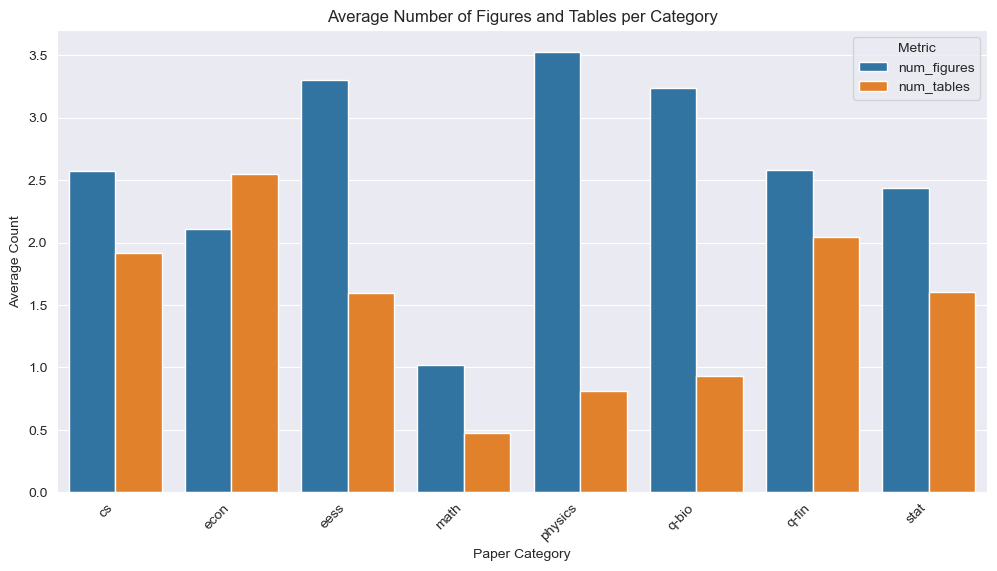

In [14]:
df["num_figures"] = pd.to_numeric(df["num_figures"], errors="coerce")
df["num_tables"] = pd.to_numeric(df["num_tables"], errors="coerce")

# Group by category and compute averages
category_averages = df.groupby("domain")[["num_figures", "num_tables"]].mean()

# Display the summary
print(category_averages)

plt.figure(figsize=(12, 6))

# Reshape data for better plotting
category_averages.reset_index(inplace=True)
melted_df = category_averages.melt(id_vars="domain", var_name="Metric", value_name="Average Count")

# Plot
sns.barplot(data=melted_df, x="domain", y="Average Count", hue="Metric")
plt.xticks(rotation=45, ha="right")
plt.title("Average Number of Figures and Tables per Category")
plt.ylabel("Average Count")
plt.xlabel("Paper Category")
plt.legend(title="Metric")
plt.show()

In [18]:
# Change of object amount after filtering

start_figures = df["num_figures"].sum()
start_tables = df["num_tables"].sum()

end_figures = 115631
end_tables = 28273

change_figures =  1 - (end_figures / start_figures)
change_tables = 1 - (end_tables / start_tables)

print("Before filtering:")
print("Figures:", start_figures)
print("Tables:", start_tables)

print("\nAfter filtering:")
print("Figures:", end_figures)
print("Tables:", end_tables)

print("\nFiltering percentage:")
print(f"Figures: {change_figures:.4f}")
print(f"Tables: {change_tables:.4f}")

Before filtering:
Figures: 278756
Tables: 163329

After filtering:
Figures: 115631
Tables: 28273

Filtering percentage:
Figures: 0.5852
Tables: 0.8269
